# Comparing a USGSCSM and ISIS camera for Dejittered HiRISE image

In [ ]:
import pyproj
import pvl
import numpy as np
import os
import pandas as pd
import json
from IPython.display import Image

import knoten
from knoten import vis
import csmapi
import ale
from pysis import isis
from pysis.exceptions import ProcessError

import plotly
plotly.offline.init_notebook_mode(connected=True)

## Update the ISIS cube
Requires ESP_016076_2175_REDmos_hijitreged.balance.noproj.8bit.cub in data directory

We also have to set the shapemodel to the ellipsoid because CSM does not natively support DEM intersections

In [2]:
cub_loc = 'data/ESP_016076_2175_REDmos_hijitreged.balance.noproj.8bit.cub'

try:
    isis.editlab(from_=cub_loc, grpname='Kernels', Keyword='ShapeModel', value='Null')
except ProcessError as e:
    print(f'Failed to set shapemodel for {cub_loc} to ellipsoid:\n{e.stderr}')

## Generate a USGSCSM ISD

In [3]:
usgscsm_str = ale.loads(cub_loc, formatter='usgscsm')

csm_isd = os.path.splitext(cub_loc)[0] + '.json'
with open(csm_isd, 'w') as isd_file:
    isd_file.write(usgscsm_str)

usgscsm_json = json.loads(usgscsm_str)
n_lines = usgscsm_json['image_lines']
n_samples = usgscsm_json['image_samples']

## Compare the Exterior Orientations

In [4]:
csmisis_diff_lv_plot, csmisis_diff_ephem_plot, external_orientation_data = vis.external_orientation_diff(csm_isd, cub_loc, n_lines, n_samples, nx=10, ny=50, width=600, height=600)

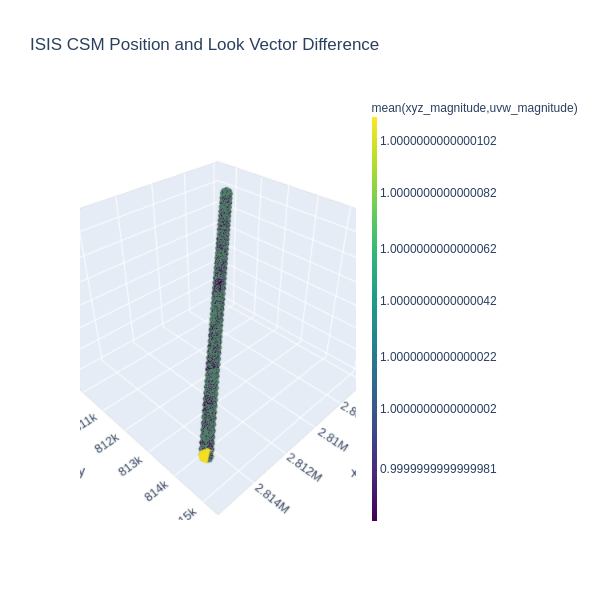

In [5]:
Image(csmisis_diff_lv_plot.to_image())

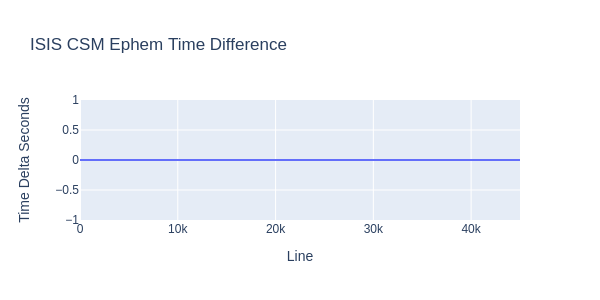

In [6]:
Image(csmisis_diff_ephem_plot.to_image())

In [7]:
external_orientation_data.describe()

isis pos x     isis pos y    isis pos z    csm lv x    csm lv y  \
count  5.000000e+02     500.000000  5.000000e+02  500.000000  500.000000   
mean   2.810832e+06  812348.029736  2.234689e+06   -0.708145   -0.340549   
std    2.275241e+03    1171.310993  3.327603e+03    0.002613    0.005171   
min    2.806970e+06  810360.820818  2.229042e+06   -0.713136   -0.349173   
25%    2.808864e+06  811334.536932  2.231809e+06   -0.710348   -0.345034   
50%    2.810834e+06  812348.351796  2.234690e+06   -0.708157   -0.340548   
75%    2.812802e+06  813361.683406  2.237568e+06   -0.705942   -0.336072   
max    2.814688e+06  814334.025277  2.240330e+06   -0.703124   -0.331894   

         csm lv z   isis lv x   isis lv y   isis lv z       diffx       diffy  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean    -0.618484   -0.708145   -0.340549   -0.618484    0.000020    0.000010   
std      0.000880    0.002613    0.005171    0.000880    0.000041    0.000021   
min     -0.620064   -0.713136   -0.349173   -0.620064   -0.000055   -0.000029   
25%     -0.619244   -0.710348   -0.345034   -0.619244   -0.000007   -0.000004   
50%     -0.618484   -0.708157   -0.340548   -0.618484    0.000021    0.000011   
75%     -0.617725   -0.705942   -0.336072   -0.617725    0.000048    0.000025   
max     -0.616873   -0.703124   -0.331894   -0.616873    0.000104    0.000053   

            diffz         diffu         diffv         diffw  xyz_magnitude  \
count  500.000000  5.000000e+02  5.000000e+02  5.000000e+02   5.000000e+02   
mean    -0.000029 -5.337440e-12 -2.927530e-12  7.725310e-12   6.826998e-05   
std      0.000060  1.093834e-11  5.988364e-12  1.582114e-11   4.921283e-05   
min     -0.000152 -2.765910e-11 -1.486272e-11 -2.125011e-11   4.667311e-08   
25%     -0.000071 -1.292388e-11 -7.009587e-12 -2.555983e-12   2.582402e-05   
50%     -0.000031 -5.552392e-12 -2.994549e-12  8.025747e-12   6.393166e-05   
75%      0.000010  1.769973e-12  9.690027e-13  1.868658e-11   1.011785e-04   
max      0.000081  1.472078e-11  8.187895e-12  3.994849e-11   1.912095e-04   

       uvw_magnitude  isis ephem time  csm ephem time  diff ephem  
count   5.000000e+02     5.000000e+02    5.000000e+02       500.0  
mean    1.817329e-11     3.155035e+08    3.155035e+08         0.0  
std     1.310797e-11     1.227762e+00    1.227762e+00         0.0  
min     3.436315e-15     3.155035e+08    3.155035e+08         0.0  
25%     6.841331e-12     3.155035e+08    3.155035e+08         0.0  
50%     1.695400e-11     3.155035e+08    3.155035e+08         0.0  
75%     2.695314e-11     3.155035e+08    3.155035e+08         0.0  
max     5.081149e-11     3.155035e+08    3.155035e+08         0.0

## Compare the Ground Intersections and Back Projections

In [8]:
isis2csm_plot, csm2isis_plot, isiscsm_plotlatlon, isiscsm_plotbf, isis2csm_data, csm2isis_data, isiscsm_latlondata, isiscsm_bfdata = vis.reprojection_diff(csm_isd, cub_loc, n_lines, n_samples, nx=10, ny=50, width=600, height=600, edge_pad=5.0)

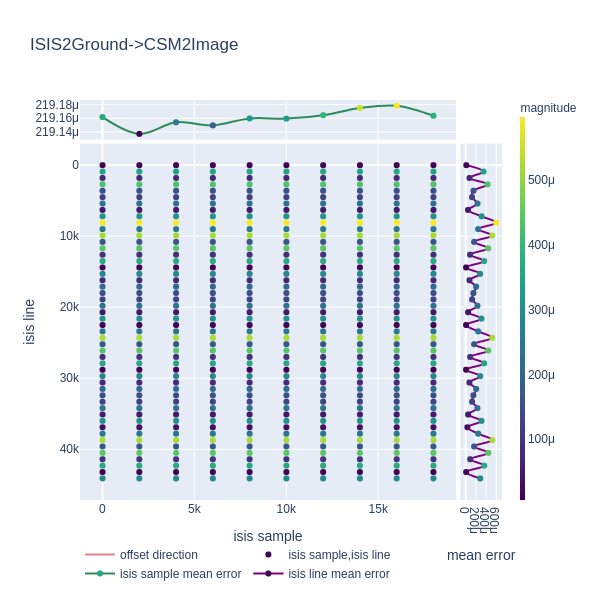

In [9]:
Image(isis2csm_plot.to_image())

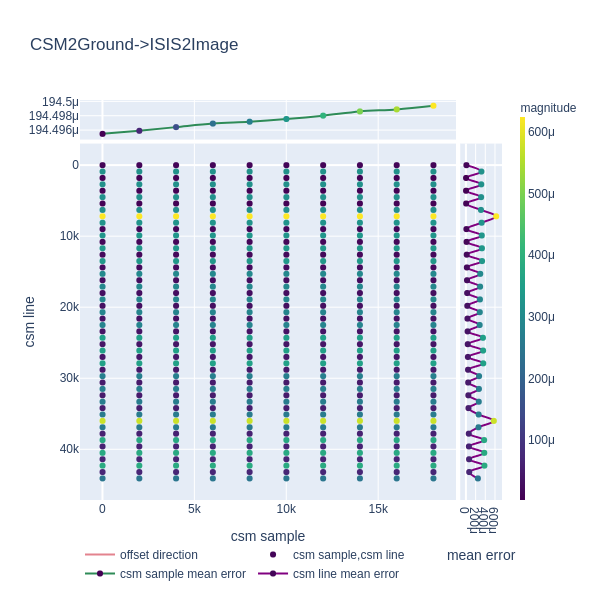

In [10]:
Image(csm2isis_plot.to_image())

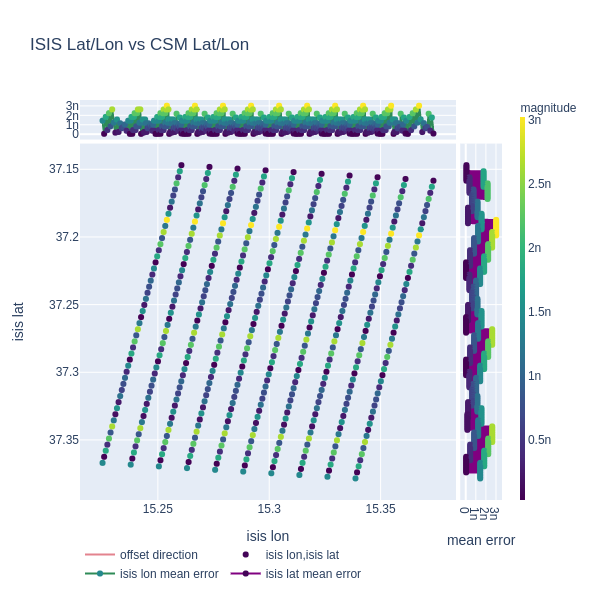

In [11]:
Image(isiscsm_plotlatlon.to_image())

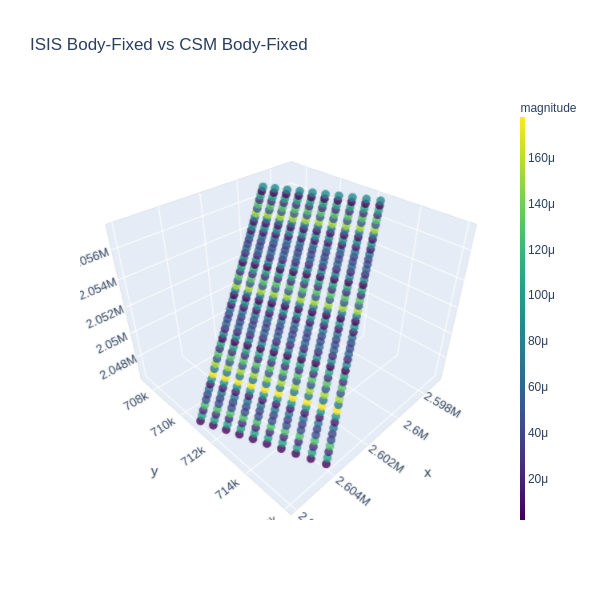

In [12]:
Image(isiscsm_plotbf.to_image())

In [13]:
isis2csm_data[['diff line', 'diff sample']].describe()

diff line   diff sample
count  500.000000  5.000000e+02
mean    -0.000095 -1.766260e-07
std      0.000253  1.696641e-06
min     -0.000597 -8.032108e-06
25%     -0.000282 -1.097719e-06
50%     -0.000086 -6.276923e-08
75%      0.000072  1.018112e-06
max      0.000429  2.336286e-06

In [14]:
csm2isis_data[['diff line', 'diff sample']].describe()

diff line   diff sample
count  500.000000  5.000000e+02
mean    -0.000025  1.814952e-07
std      0.000253  1.696695e-06
min     -0.000624 -2.376000e-06
25%     -0.000268 -9.643570e-07
50%      0.000020  3.540570e-08
75%      0.000061  1.076300e-06
max      0.000382  8.027000e-06